# Region and Domain

Europe, Sports and Athletics

# Research Question

Which football team in Europe spent the most in annual wages to gain a point in their respective divisions in the 2019/2020 season?

In [165]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.style.use('seaborn')

In [166]:
def clean_database(df, wages):

    wages['Annual Avg. Pay ($)'] = wages['Annual Avg. Pay ($)'].replace('[\$,]', '', regex=True).astype(float)

    merged_df = pd.merge(df, wages, how='outer', left_index=True, right_index=True)
    merged_df['cost/goal'] = merged_df['Annual Avg. Pay ($)']/merged_df['GF']
    merged_df['cost/point'] = merged_df['Annual Avg. Pay ($)']/merged_df['Pts']
    merged_df['Relative Spending'] = round(merged_df['Annual Avg. Pay ($)']/merged_df['Annual Avg. Pay ($)'].mean(), 2)
    
    return merged_df

def per_goal(df):
    x = df['Squad_x']
    y = df['cost/goal']

    fig, ax1 = plt.subplots(figsize=(20, 8))

    ax1.scatter(x, y, c=y, cmap='inferno', alpha=0.8)
    ax.set_xticks(rotation=90, fontsize=8)
    plt.set_yticks([])
    ax.colorbar(label='Wages (US Dollar)')
    ax.title('Cost per goal scored (19/20)')
    ax.tight_layout()
    ax.savefig('/Users/riro/Documents/GitHub/umich_ds/plotting/cost per goal.png')
    
def per_point(df):
    x = df['Squad_x']
    y = df['cost/point']

    area = y/300
    fig, ax1 = plt.subplots(figsize=(20, 8))

    plt.scatter(x, y, c=y, s=area, cmap='viridis', alpha=0.8)
    
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(False, axis='y')
    plt.colorbar()
    plt.title('Cost per point gained (19/20)')
    plt.tight_layout()

    ax2 = plt.gca().twinx()
    ax2.plot(merged_df['Relative Spending'], '--x', label = 'Relative spending')
    plt.grid(False, axis='y')
    plt.legend()
    
    plt.savefig('/Users/riro/Documents/GitHub/umich_ds/plotting/cost per point.png', dpi=300)

<IPython.core.display.Javascript object>


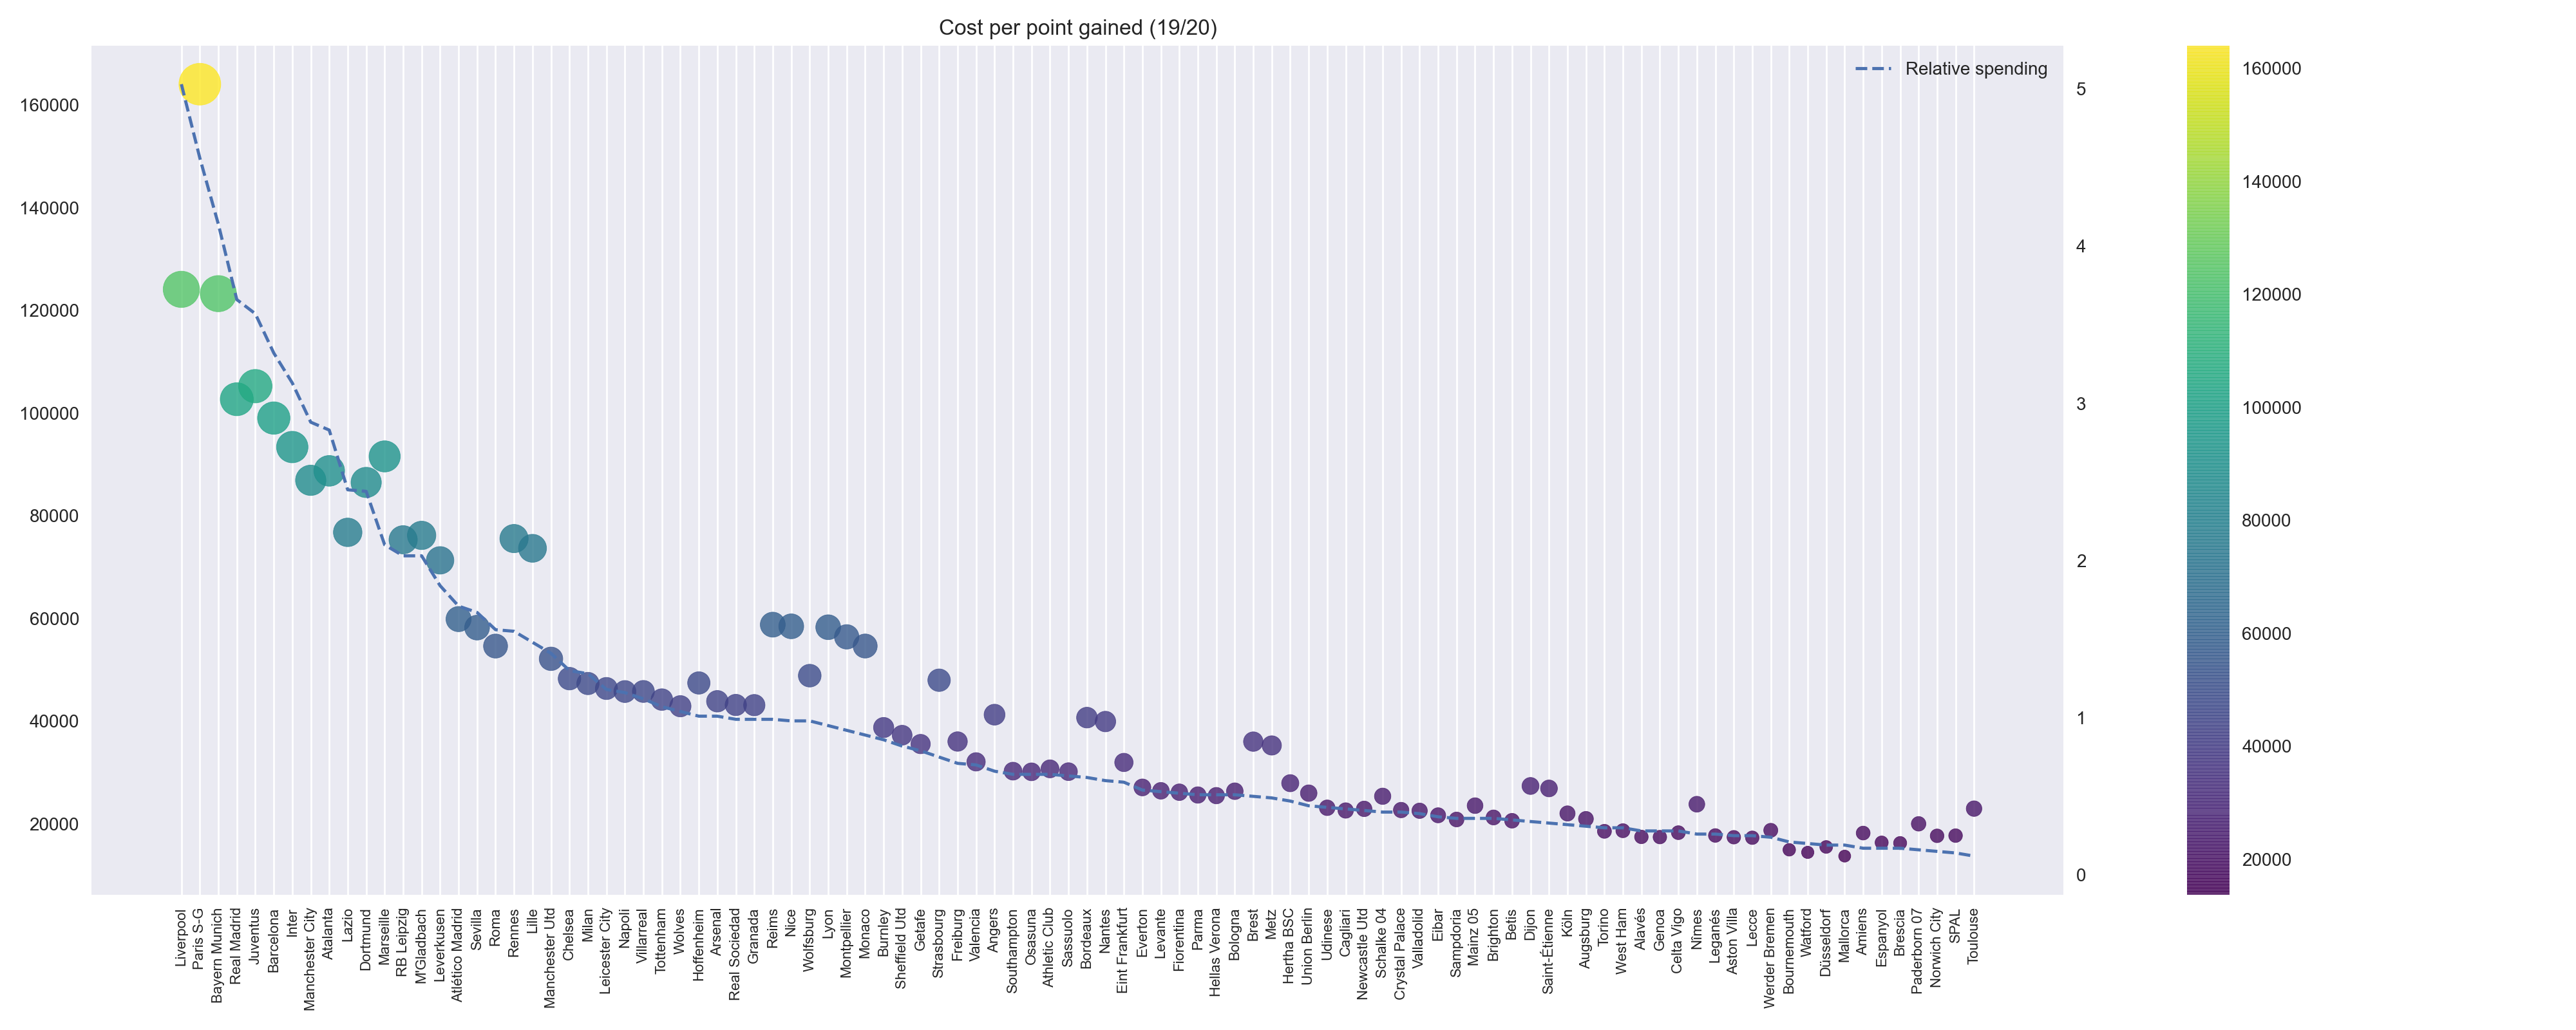

In [167]:
df = pd.read_csv('/Users/riro/Documents/GitHub/umich_ds/plotting/data/bigfive.csv')
wages = pd.read_csv('/Users/riro/Documents/GitHub/umich_ds/plotting/data/bigfive_wages.csv')

merged_df = clean_database(df, wages)
per_point(merged_df)

# Research Question

How does the Bundesliga's payroll impact performance?

In [168]:
bundesliga = merged_df.where(merged_df['Country_x'] == 'de GER').dropna().reset_index()

In [169]:
bundesliga.drop(['index', 'Squad_y', 'Country_y'], axis=1, inplace=True)

In [171]:
bundesliga['Annual Avg. Pay ($)']

0     10106647.0
1      5967500.0
2      4971358.0
3      4951304.0
4      4492903.0
5      2466862.0
6      2394167.0
7      1729542.0
8      1438064.0
9      1144689.0
10     1065068.0
11      989583.0
12      871133.0
13      792852.0
14      755025.0
15      580929.0
16      465119.0
17      400121.0
Name: Annual Avg. Pay ($), dtype: float64

<IPython.core.display.Javascript object>


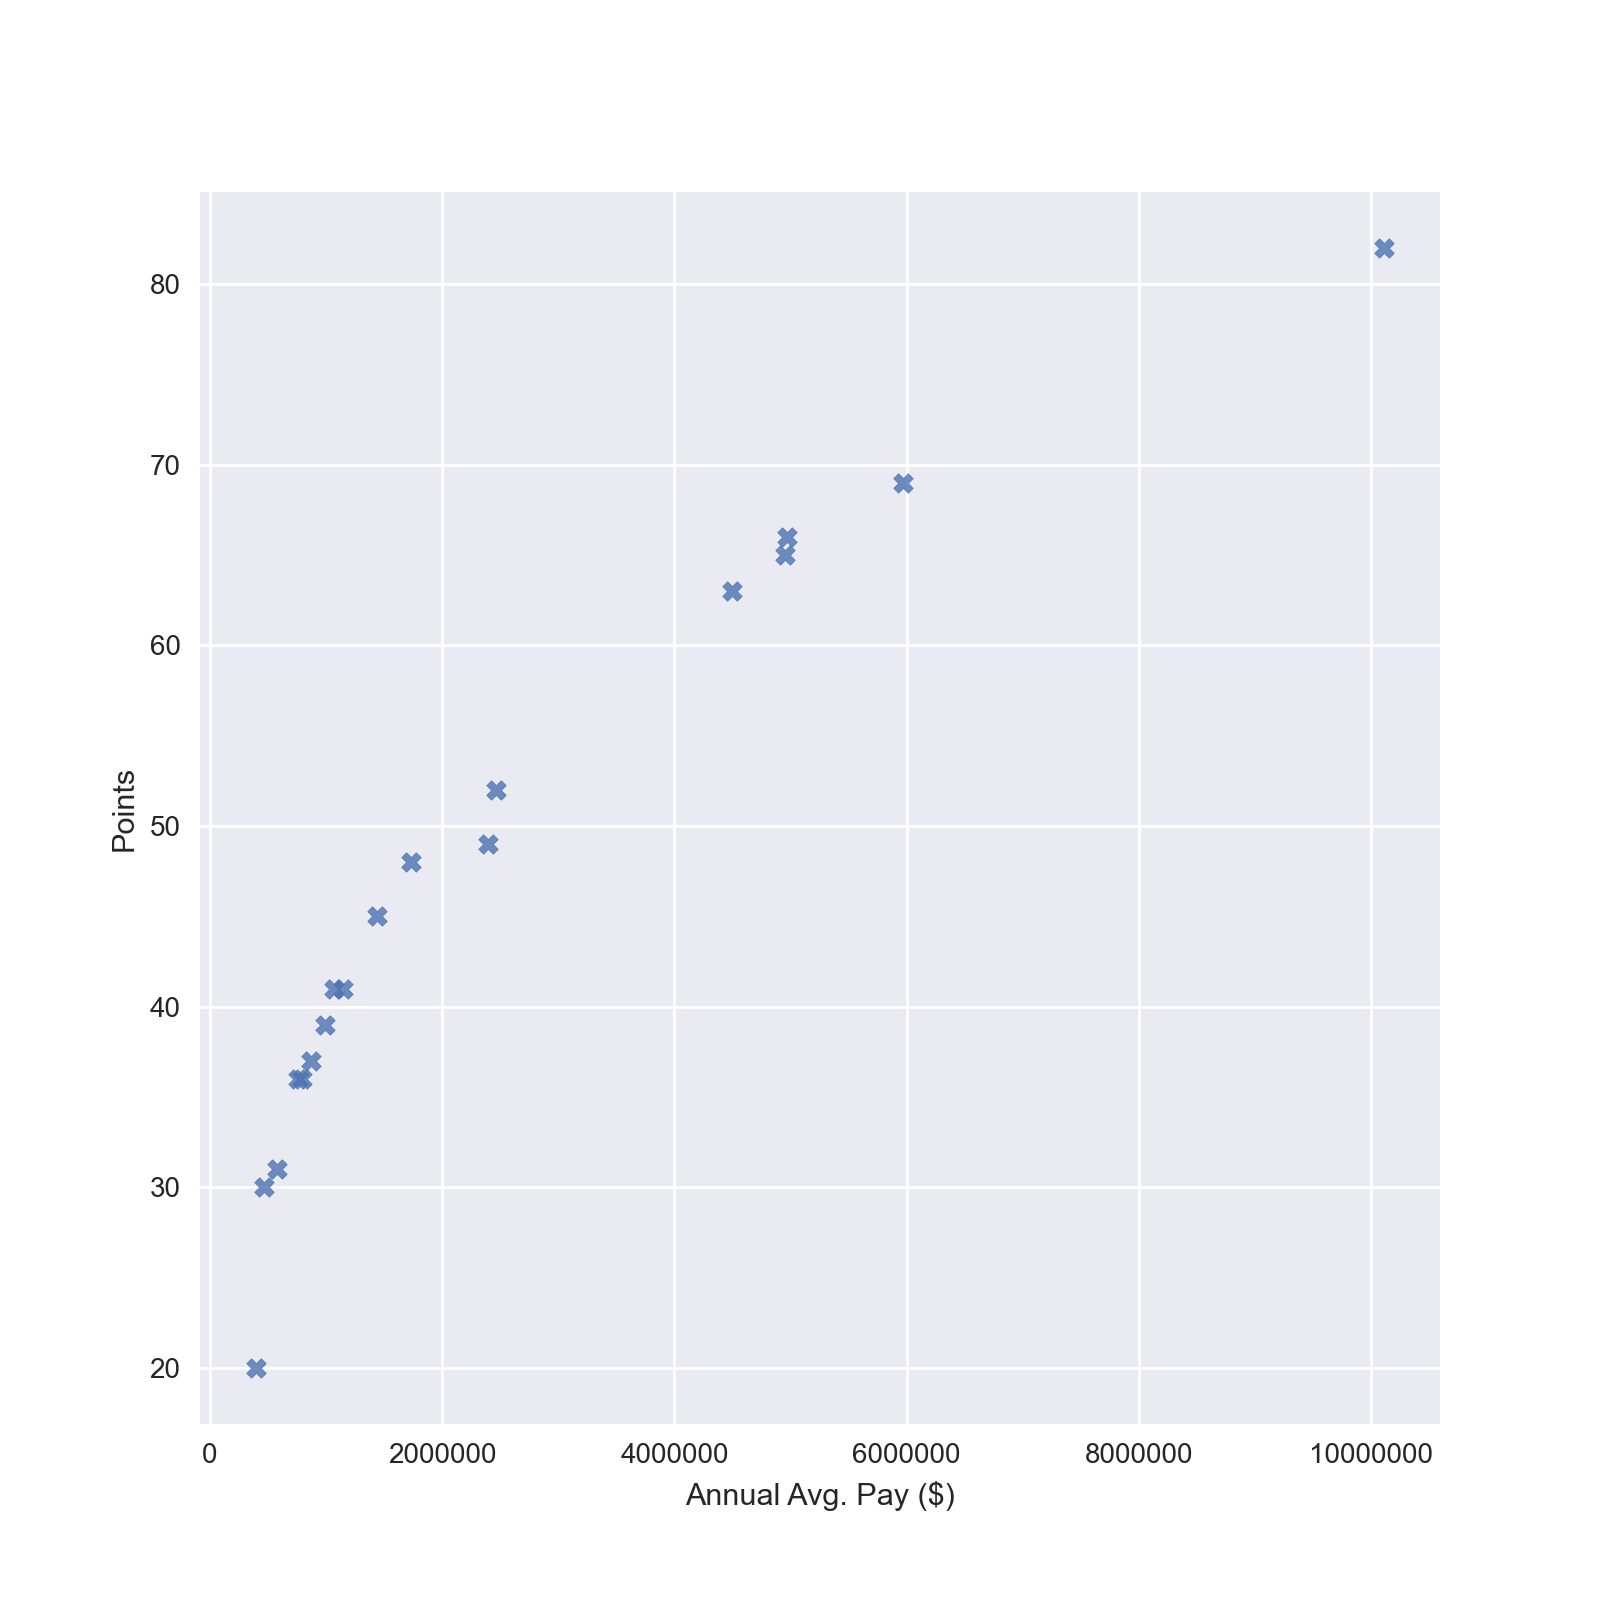

Text(0, 0.5, 'Points')

In [94]:
x = bundesliga['Annual Avg. Pay ($)']
y = bundesliga['Pts']


money = bundesliga['Annual Avg. Pay ($)']

# def millions(x, pos):
#     return '$%1.1fM' % (x * 1e-6)

# formatter = ScalarFormatter(millions)

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x, y, alpha=0.8, marker= 'X')
# ax.xaxis.set_major_formatter(formatter)
plt.gca()
plt.ticklabel_format(style='plain', useOffset=False)
plt.xlabel('Annual Avg. Pay ($)')
plt.ylabel('Points')

<IPython.core.display.Javascript object>


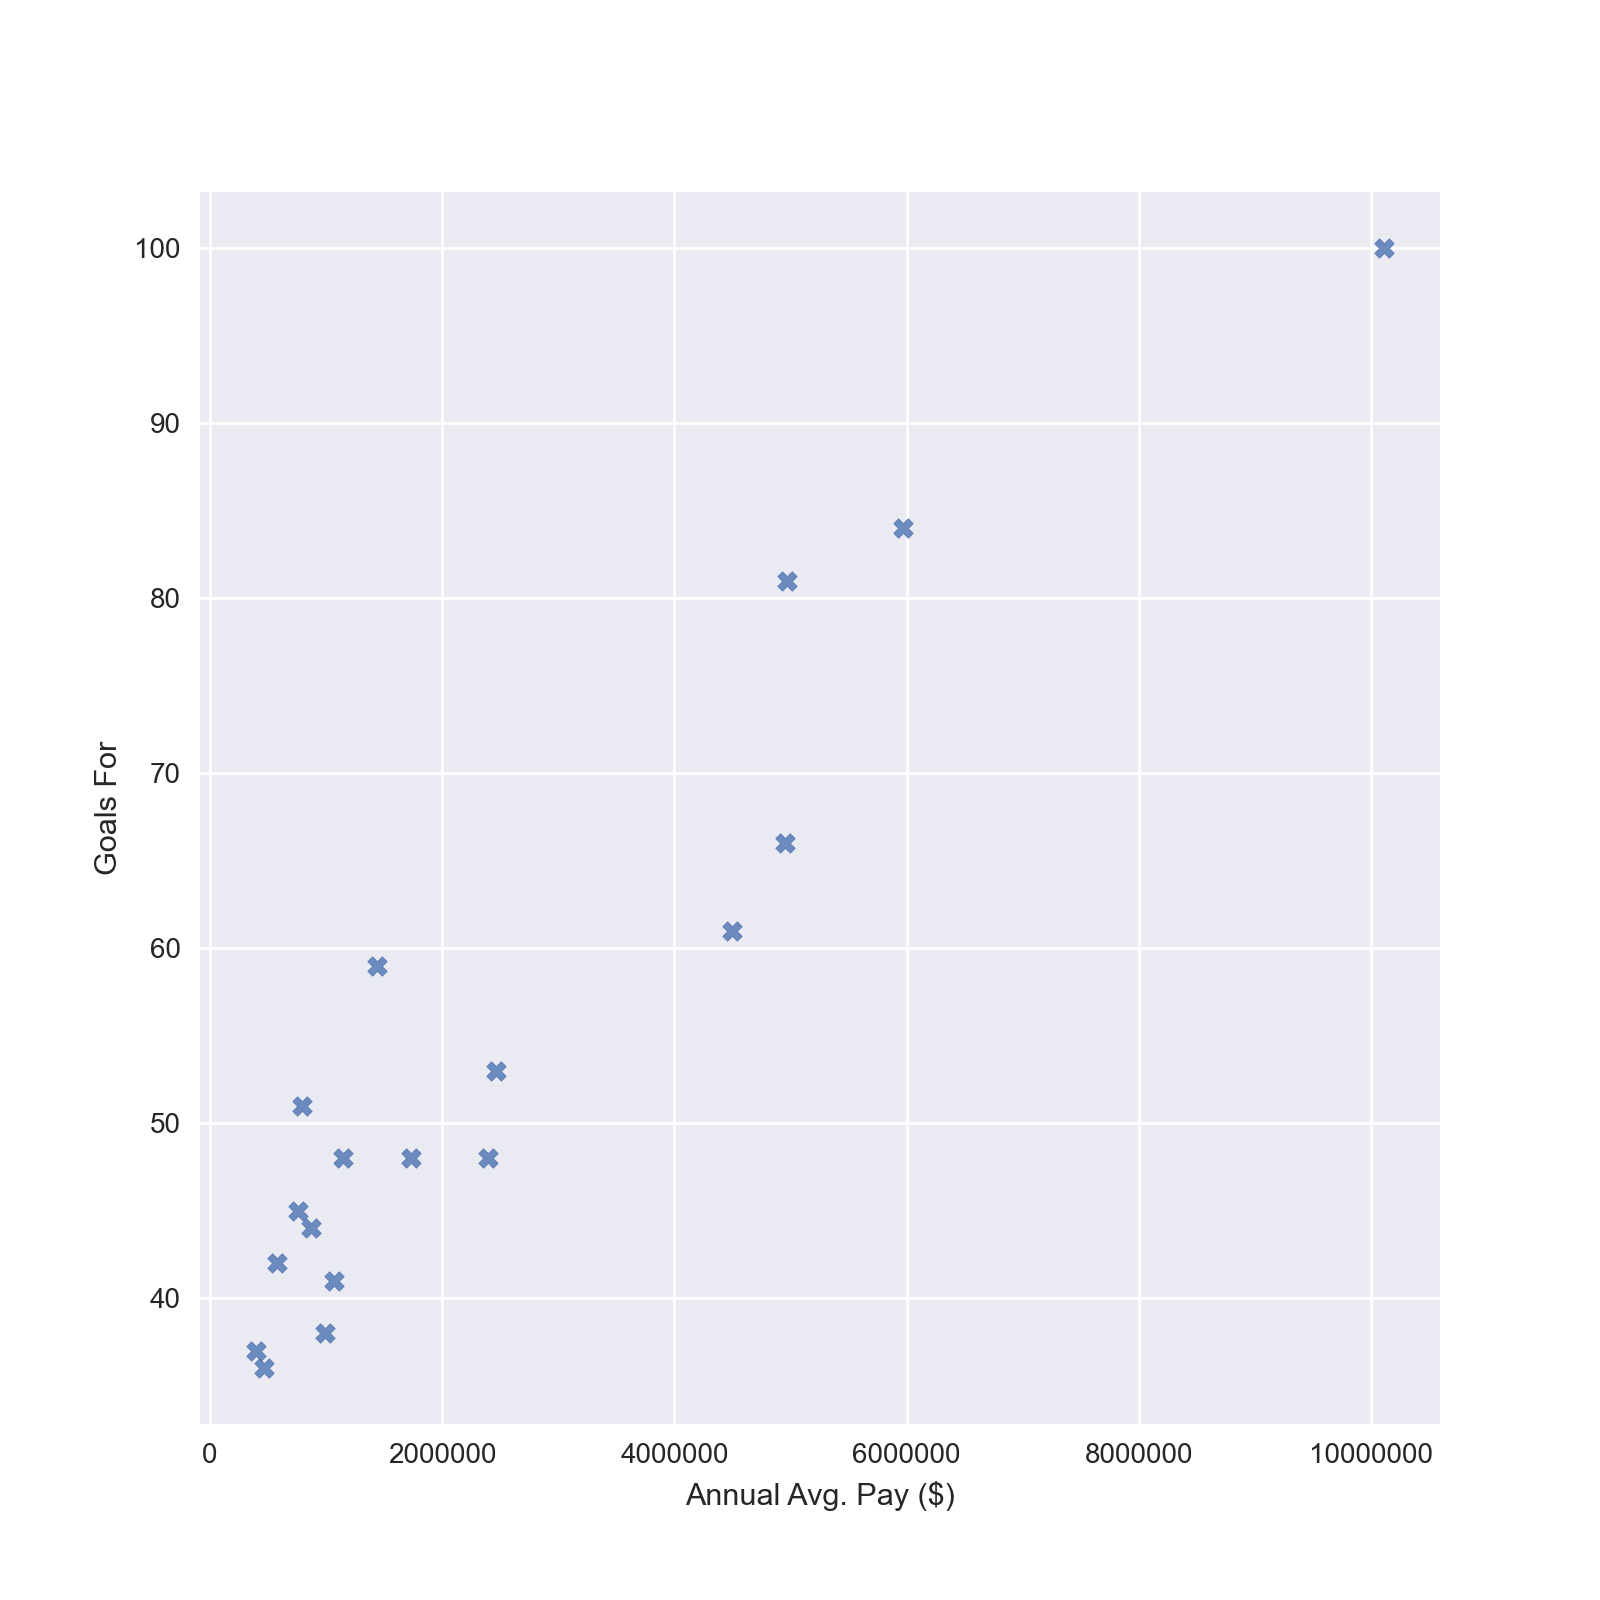

Text(0, 0.5, 'Goals For')

In [95]:
x = bundesliga['Annual Avg. Pay ($)']
y = bundesliga['GF']


fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x, y, alpha=0.8, marker= 'X')
plt.gca()
plt.ticklabel_format(style='plain', useOffset=False)
plt.xlabel('Annual Avg. Pay ($)')
plt.ylabel('Goals For')

<IPython.core.display.Javascript object>


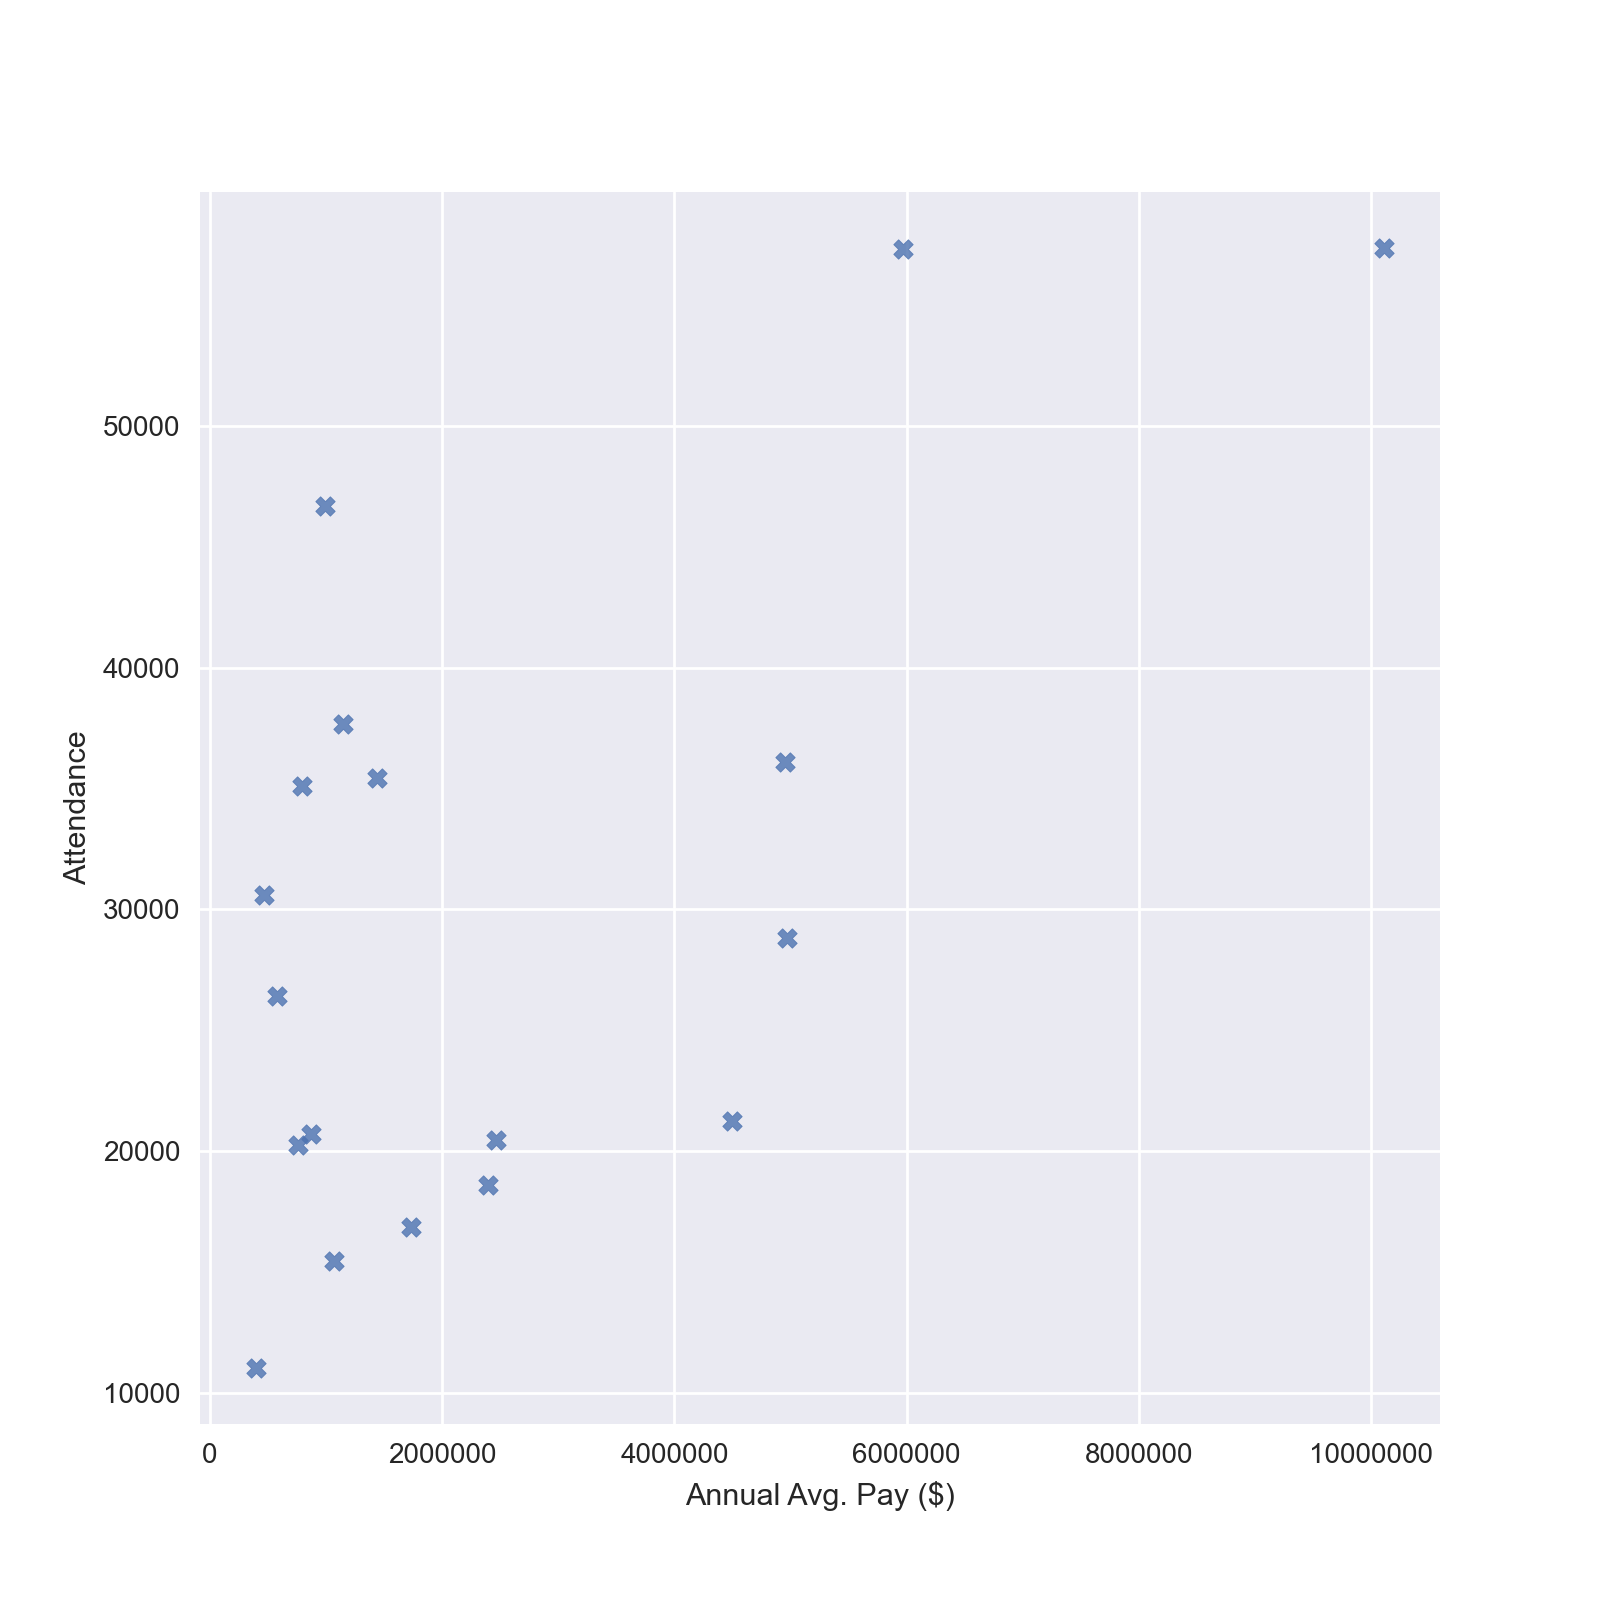

Text(0, 0.5, 'Attendance')

In [96]:
x = bundesliga['Annual Avg. Pay ($)']
y = bundesliga['Attendance']


fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x, y, alpha=0.8, marker= 'X')
plt.gca()
plt.ticklabel_format(style='plain', useOffset=False)
plt.xlabel('Annual Avg. Pay ($)')
plt.ylabel('Attendance')

In [126]:
# TODO: 
# Get wages data for last five years
# Get points for the last five years

In [177]:
bundesliga_2015 = pd.read_csv('/Users/riro/Documents/GitHub/umich_ds/plotting/data/bundesliga_2015.csv')
wages = pd.read_csv('/Users/riro/Documents/GitHub/umich_ds/plotting/data/bundesliga_wages.csv', skipfooter=2, engine='python')

In [179]:
bundesliga_2015 = bundesliga_2015.join(wages)

In [180]:
bundesliga_2015.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GDiff', 'Pts',
       'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Team', '2016',
       '2017', '2018', '2019', 'Unnamed: 5'],
      dtype='object')

<IPython.core.display.Javascript object>


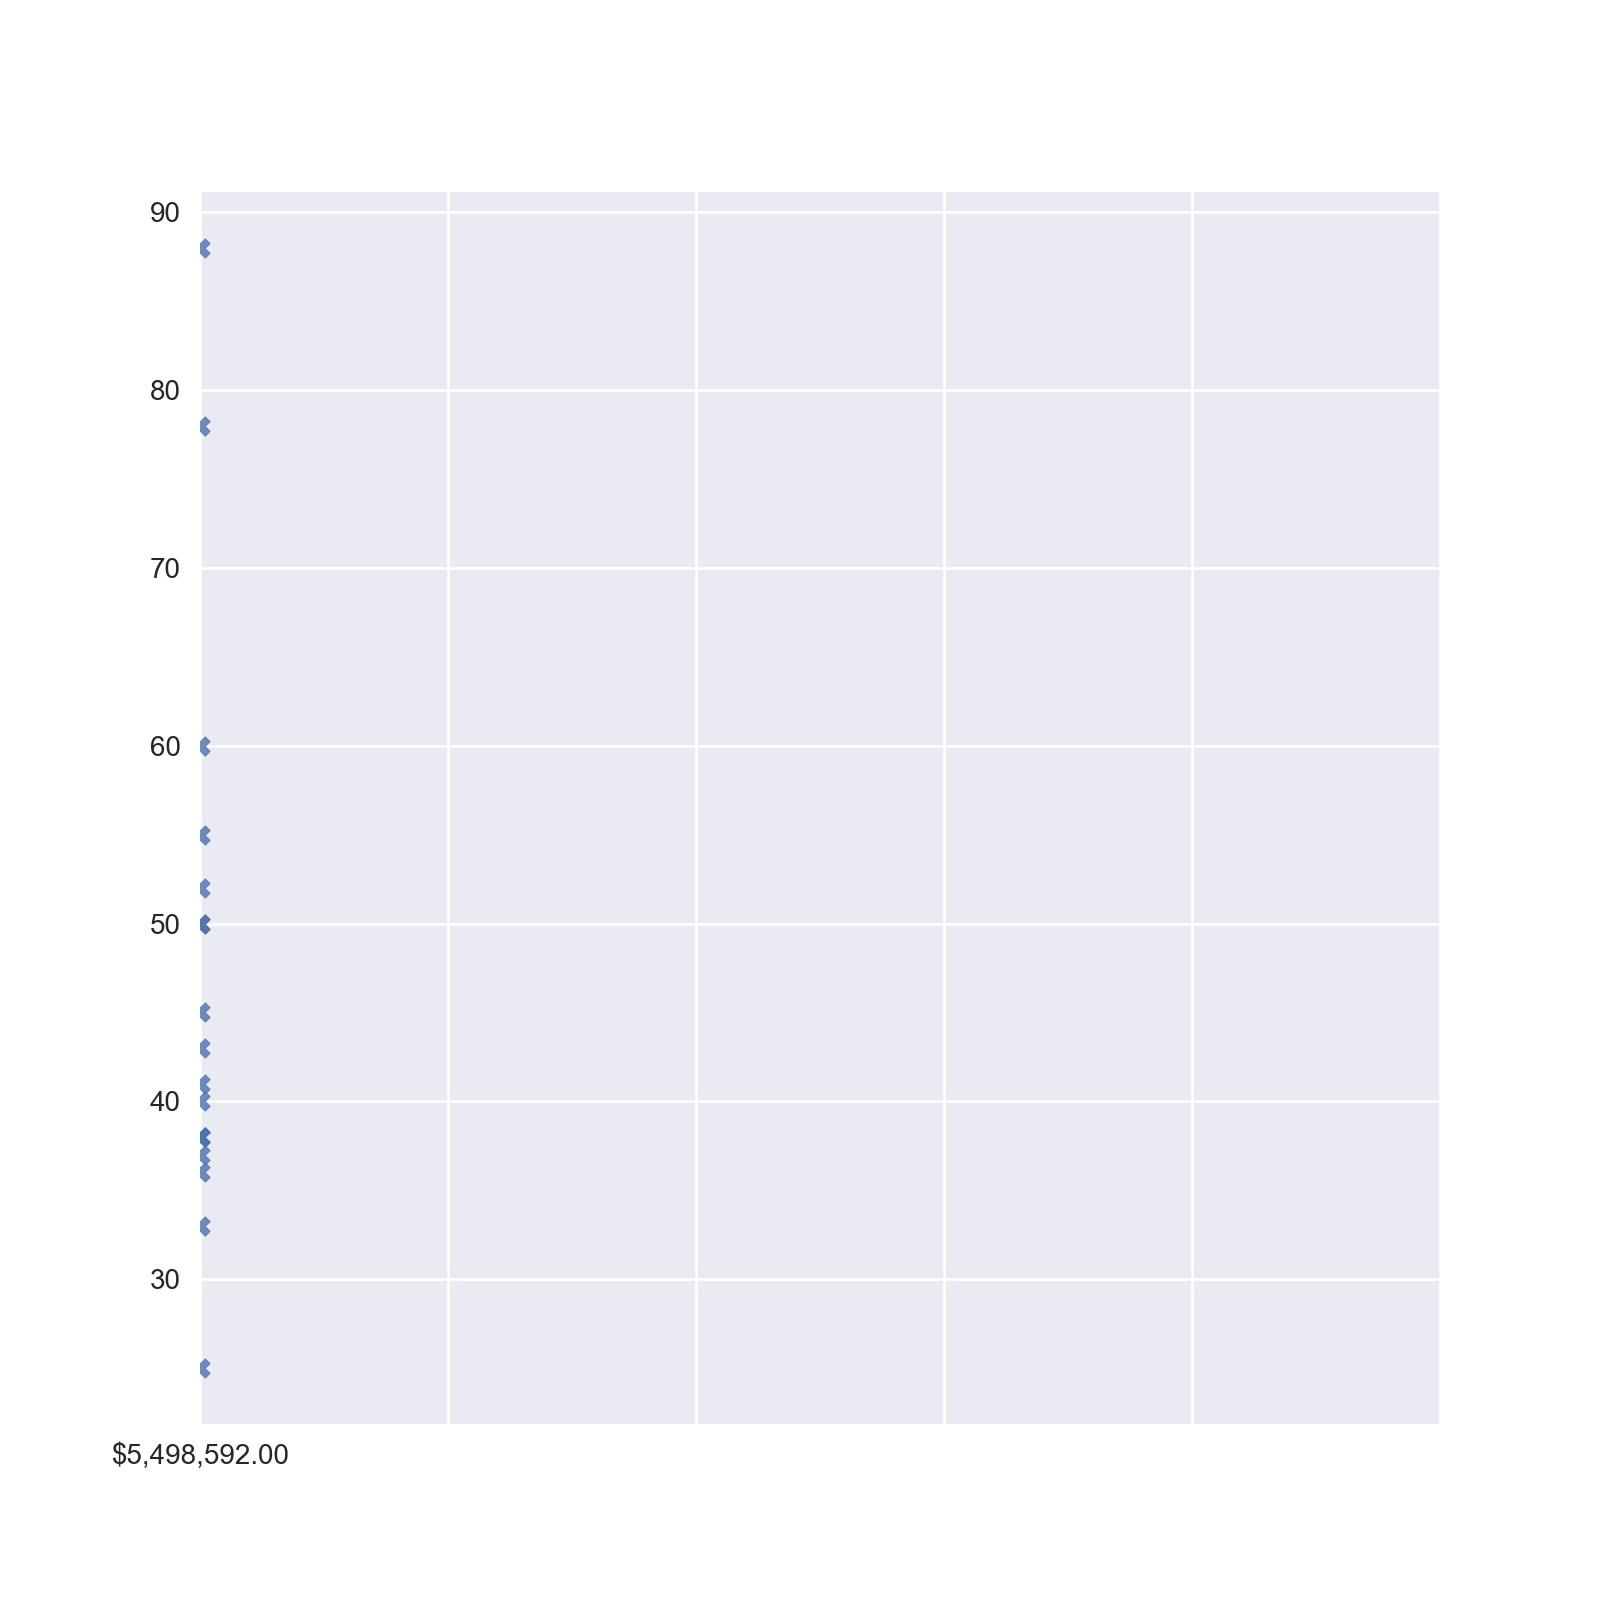

In [175]:
x = bundesliga_2015['2016']
y = bundesliga_2015['Pts']

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x, y, alpha=0.8, marker= 'X')
plt.gca()
# plt.xlim(0, 1000000)
ax.set_xticks([0, 2000000, 4000000, 6000000, 8000000, 10000000])

In [181]:
wages

,Team,2016,2017,2018,2019,Unnamed: 5
0,Bayern Munich,"$5,498,592.00","$6,739,250.00","$8,358,534.00","$8,119,896.00",NaN
1,Dortmund,"$2,651,357.00","$3,560,893.00","$4,219,466.00","$4,971,358.00",NaN
2,Schalke 04,"$2,333,925.00","$2,150,268.00","$2,800,709.00","$2,185,181.00",NaN
3,Wolfsburg,"$2,254,011.00","$2,311,740.00","$2,544,751.00","$2,410,395.00",NaN
4,Leverkusen,"$1,861,877.00","$1,973,920.00","$2,919,550.00","$3,186,501.00",NaN
5,M'Gladbach,"$1,287,123.00","$1,399,561.00","$1,720,315.00","$1,919,327.00",NaN
6,Hamburger SV,"$1,174,404.00","$1,318,223.00",NaN,NaN,NaN
7,Hoffenheim,"$1,073,702.00","$1,463,039.00","$1,567,798.00","$1,699,966.00",NaN
8,Hertha BSC,"$1,039,290.00","$1,300,455.00","$1,094,403.00","$1,295,360.00",NaN
9,RB Leipzig,"$1,001,275.00","$1,650,197.00","$2,054,481.00","$2,416,364.00",NaN


In [ ]:
x = bundesliga_2015['2016']